In [1]:
import sys
try:
    del sys.modules["spnhelp"]
except:
    pass
import spnhelp
try:
    del sys.modules["clg"]
except:
    pass
from clg import CLG, noise
from math import sqrt
from spn.io.Text import spn_to_str_equation
import pandas as pd
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
from spn.algorithms.Marginalization import marginalize
from spn.algorithms.Inference import likelihood
import scipy.stats as stats

### clg to spn

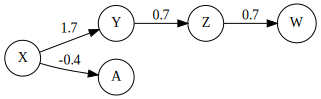

In [2]:
X = "X" @ (sqrt(3) * noise)
Y  = "Y" @ (sqrt(3) * X + noise + 2)
Z  = "Z" @ (1 + sqrt(0.5) * (Y + 0.5*noise) + 3)
W  = "W" @ (1 + sqrt(0.5) * (Z + noise))

A = "A" @ (-0.4 * X - 0.5 * noise - 3)

clg = CLG([X])
clg.show_graph()

['X', 'Y', 'A', 'Z', 'W']


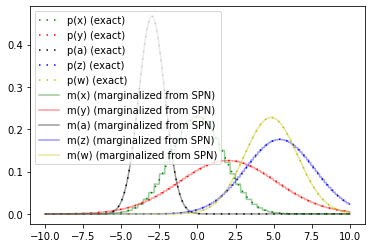

In [3]:
spn = spnhelp.clg_to_spn(clg, 0.4, accept_split_criterion=spnhelp.split_until_at_most_eps_wide)
print(clg.get_scope())
spn_marg_x = marginalize(spn, [0])
spn_marg_y = marginalize(spn, [1])
spn_marg_a = marginalize(spn, [2])
spn_marg_z = marginalize(spn, [3])
spn_marg_w = marginalize(spn, [4])

plt.rcParams["figure.figsize"] = (12, 6)

x = np.linspace(-10, 10, 1000)
plt.plot(x, stats.norm.pdf(x, X.current_mean, X.current_sd), label = "p(x) (exact)", linestyle =  (0, (1, 4)), c="g")
plt.plot(x, stats.norm.pdf(x, Y.current_mean, Y.current_sd), label = "p(y) (exact)", linestyle =  (0, (1, 4)), c="r")
plt.plot(x, stats.norm.pdf(x, A.current_mean, A.current_sd), label = "p(a) (exact)", linestyle =  (0, (1, 4)), c="k")
plt.plot(x, stats.norm.pdf(x, Z.current_mean, Z.current_sd), label = "p(z) (exact)", linestyle =  (0, (1, 4)), c="b")
plt.plot(x, stats.norm.pdf(x, W.current_mean, W.current_sd), label = "p(w) (exact)", linestyle =  (0, (1, 4)), c="y")
nan_fill = np.full_like(x, np.nan)
plt.plot(x, likelihood(spn_marg_x, np.c_[x.reshape(-1, 1), nan_fill, nan_fill, nan_fill, nan_fill]), label = "m(x) (marginalized from SPN)", c="g", alpha=0.4)
plt.plot(x, likelihood(spn_marg_y, np.c_[nan_fill, x.reshape(-1, 1), nan_fill, nan_fill, nan_fill]), label = "m(y) (marginalized from SPN)", c="r", alpha=0.4)
plt.plot(x, likelihood(spn_marg_a, np.c_[nan_fill, nan_fill, x.reshape(-1, 1), nan_fill, nan_fill]), label = "m(a) (marginalized from SPN)", c="k", alpha=0.4)
plt.plot(x, likelihood(spn_marg_z, np.c_[nan_fill, nan_fill, nan_fill, x.reshape(-1, 1), nan_fill]), label = "m(z) (marginalized from SPN)", c="b", alpha=0.4)
plt.plot(x, likelihood(spn_marg_w, np.c_[nan_fill, nan_fill, nan_fill, nan_fill, x.reshape(-1, 1)]), label = "m(w) (marginalized from SPN)", c="y", alpha=0.4)
plt.legend();

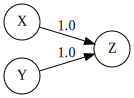

In [4]:
X = "X" @ noise
Y = "Y" @ (sqrt(2) * noise)
Z = "Z" @ (X + Y + noise)
clg = CLG([X, Y])
clg.show_graph()

$$\log(m(x)) \leq \log(p(x)) + \varepsilon$$
$$|\log(m(x)) - \log(p(x))| \leq \varepsilon$$
$$\iff |\log(m(x)/p(x))| \leq \varepsilon$$

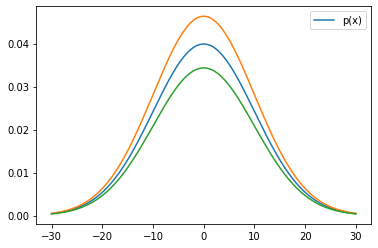

In [5]:
import scipy.stats as stats
eps = 0.15
sd = 10
xs = np.linspace(-30, 30, 1000)
plt.plot(xs, [stats.norm.pdf(x, 0, sd) for x in xs], label = "p(x)")
plt.plot(xs, [np.exp(np.log(stats.norm.pdf(x, 0, sd)) + eps) for x in xs])
plt.plot(xs, [np.exp(np.log(stats.norm.pdf(x, 0, sd)) - eps) for x in xs])
plt.legend();